https://www.kaggle.com/code/skirmer/fun-with-real-estate-data

references:

eda + no linear
https://www.kaggle.com/code/erikbruin/house-prices-lasso-xgboost-and-a-detailed-eda

linear
https://www.kaggle.com/code/skirmer/fun-with-real-estate-data

linear reg, no rmse
https://www.kaggle.com/code/lazaro97/data-preprocessing-and-linear-regression-with-r

interresante pour log et eda
https://www.kaggle.com/code/chubing/eda-and-missing-data-imputation

linear, rmse bizarre
https://www.kaggle.com/code/sidraina89/regularized-regression-housing-pricing

rmse
https://www.kaggle.com/code/pradeeptripathi/predicting-house-prices-using-r

- log(y)
- correlation num --> selection
- autre correlation
- feat importance
- replace null
- comparer rmse entre tous les modèles  

a comparer

- baseline sans rien
- avec log
- suppression variable correlés
- remplacmeent des nulls

# Introduction

- description problème de recherche
- hypothèse de recherche

Installation des packages R

In [1]:

library(ggplot2)
library(corrplot)

#library(plyr)
#library(dplyr)
#library(knitr)
#library(caret)
#library(gridExtra)
#library(scales)
#library(Rmisc)
#library(ggrepel)
#library(randomForest)
#library(psych)
library(Metrics) # rmse

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
corrplot 0.84 loaded


In [2]:
#require(ggplot2) # for data visualization
#require(stringr) #extracting string patterns
#require(Matrix) # matrix transformations
#require(glmnet) # ridge, lasso & elastinet
#require(xgboost) # gbm
#require(randomForest)
#require(Metrics) # rmse
#require(dplyr) # load this in last so plyr doens't overlap it
#require(caret) # one hot encoding
#require(scales) # plotting $$
#require(e1071) # skewness
#require(corrplot) # correlation plot

In [3]:
train=read.csv("./data/Train.csv",header=TRUE)
names(train)

[1] "MSSubClass"    "MSZoning"      "LotFrontage"   "LotArea"      
 [5] "Street"        "LotShape"      "LandContour"   "Utilities"    
 [9] "LotConfig"     "LandSlope"     "Neighborhood"  "Condition1"   
[13] "Condition2"    "BldgType"      "HouseStyle"    "OverallQual"  
[17] "OverallCond"   "YearBuilt"     "YearRemodAdd"  "RoofStyle"    
[21] "RoofMatl"      "Exterior1st"   "Exterior2nd"   "MasVnrType"   
[25] "MasVnrArea"    "ExterQual"     "ExterCond"     "Foundation"   
[29] "BsmtQual"      "BsmtCond"      "BsmtExposure"  "BsmtFinType1" 
[33] "BsmtFinSF1"    "BsmtFinType2"  "BsmtFinSF2"    "BsmtUnfSF"    
[37] "TotalBsmtSF"   "Heating"       "HeatingQC"     "CentralAir"   
[41] "Electrical"    "X1stFlrSF"     "X2ndFlrSF"     "LowQualFinSF" 
[45] "GrLivArea"     "BsmtFullBath"  "BsmtHalfBath"  "FullBath"     
[49] "HalfBath"      "BedroomAbvGr"  "KitchenAbvGr"  "KitchenQual"  
[53] "TotRmsAbvGrd"  "Functional"    "Fireplaces"    "GarageType"   
[57] "GarageYrBlt"   "GarageFinish"  "GarageCars"    "GarageArea"   
[61] "GarageQual"    "GarageCond"    "PavedDrive"    "WoodDeckSF"   
[65] "OpenPorchSF"   "EnclosedPorch" "X3SsnPorch"    "ScreenPorch"  
[69] "PoolArea"      "MiscVal"       "MoSold"        "YrSold"       
[73] "SaleType"      "SaleCondition" "SalePrice"

In [4]:
test=read.csv("./data/Test.csv",header=TRUE)
#names(test)

In [5]:
all <- rbind(train, test)
dim(train)
dim(test)
dim(all)

[1] 1095   75

[1] 365  75

[1] 1460   75

In [6]:
head(train)

MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
60,RL,63,7875,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Normal,180000
190,RL,62,10106,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,127500
20,RL,90,17217,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,7,2006,WD,Abnorml,84500
90,RL,92,12108,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,118000
20,RL,65,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,12,2007,WD,Normal,179000
50,RL,86,11500,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,322,0,0,6,2006,WD,Normal,250000


In [7]:
# affiche les 10 premières features et la target
str(train[,c(1:10, 75)])

'data.frame':	1095 obs. of  11 variables:
 $ MSSubClass : int  60 190 20 90 20 50 90 20 60 20 ...
 $ MSZoning   : Factor w/ 5 levels "C (all)","FV",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ LotFrontage: int  63 62 90 92 65 86 75 71 74 63 ...
 $ LotArea    : int  7875 10106 17217 12108 8450 11500 9825 9230 7472 8487 ...
 $ Street     : Factor w/ 2 levels "Grvl","Pave": 2 2 2 2 2 2 2 2 2 2 ...
 $ LotShape   : Factor w/ 4 levels "IR1","IR2","IR3",..: 4 4 4 4 4 1 4 4 1 4 ...
 $ LandContour: Factor w/ 4 levels "Bnk","HLS","Low",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ Utilities  : Factor w/ 2 levels "AllPub","NoSeWa": 1 1 1 1 1 1 1 1 1 1 ...
 $ LotConfig  : Factor w/ 5 levels "Corner","CulDSac",..: 5 5 5 5 5 5 5 1 2 3 ...
 $ LandSlope  : Factor w/ 3 levels "Gtl","Mod","Sev": 1 1 1 1 1 1 1 1 1 1 ...
 $ SalePrice  : int  180000 127500 84500 118000 179000 250000 100000 146000 184000 190000 ...


lignes dupliquées

In [8]:
nrow(train) - nrow(unique(train))

[1] 0

nombre de lignes avec des valeurs manquantes

In [9]:
sum(is.na(train)) 
sum(is.na(test))

[1] 0

[1] 0

---   
# Analyse exploratoire

- graphes statistiques élémentaires pour les variables et paires de variables
- Cullen-Frey pour l’étude de la distribution de la variable cible. 
- Décrivez vos résultats

### la target : SalePrice

In [10]:
#train <- read.csv("./data/Train.csv", stringsAsFactors = F)
#test <- read.csv("./data/Test.csv", stringsAsFactors = F)

La target est décalée vers la gauche (skewed), ceci pourrait s'expliquer par le fait que les prix les plus élevés ne sont pas abordables pour la plupart des gens

In [ ]:
options(repr.plot.width = 6, repr.plot.height = 3)

ggplot(data=all[!is.na(all$SalePrice),], aes(x=SalePrice)) +
        geom_histogram(bins=100, fill="blue", aes(y = ..density..)) +
        geom_density() + labs(subtitle="Title")

ggplot(data=all[!is.na(all$SalePrice),], aes(x=log(SalePrice))) +
        geom_histogram(bins=100, fill="blue", aes(y = ..density..)) +
        geom_density() + labs(subtitle="blue")

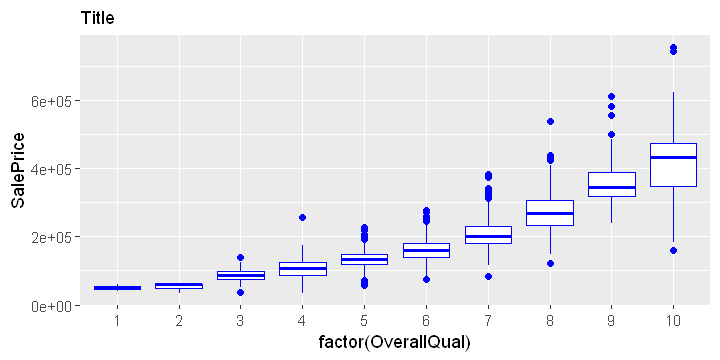

In [55]:
ggplot(data=all[!is.na(all$SalePrice),], aes(x=factor(OverallQual), y=SalePrice))+
        geom_boxplot(col='blue') +
        labs(subtitle="Title")

## Les features les plus importantes  

regardons dans un 1er temps les features numériques qui sont les plus fortement corrélées avec la target pour voir qu'elles sont celles qui ont le plus d'influcence.

Il y a 19 features numériques sur les 37 dont la corrélation est en valeur absolue supérieure à 0.3. Il est à noter que toute les corrélations sont positives car tous les chiffres sont positifs.

In [62]:
# index des vecteur de variables numériques
numericVars <- which(sapply(all, is.numeric))

# liste des noms correspondants à ces vecteurs
numericVarNames <- names(numericVars) 

# nombre
length(numericVars)

[1] 37

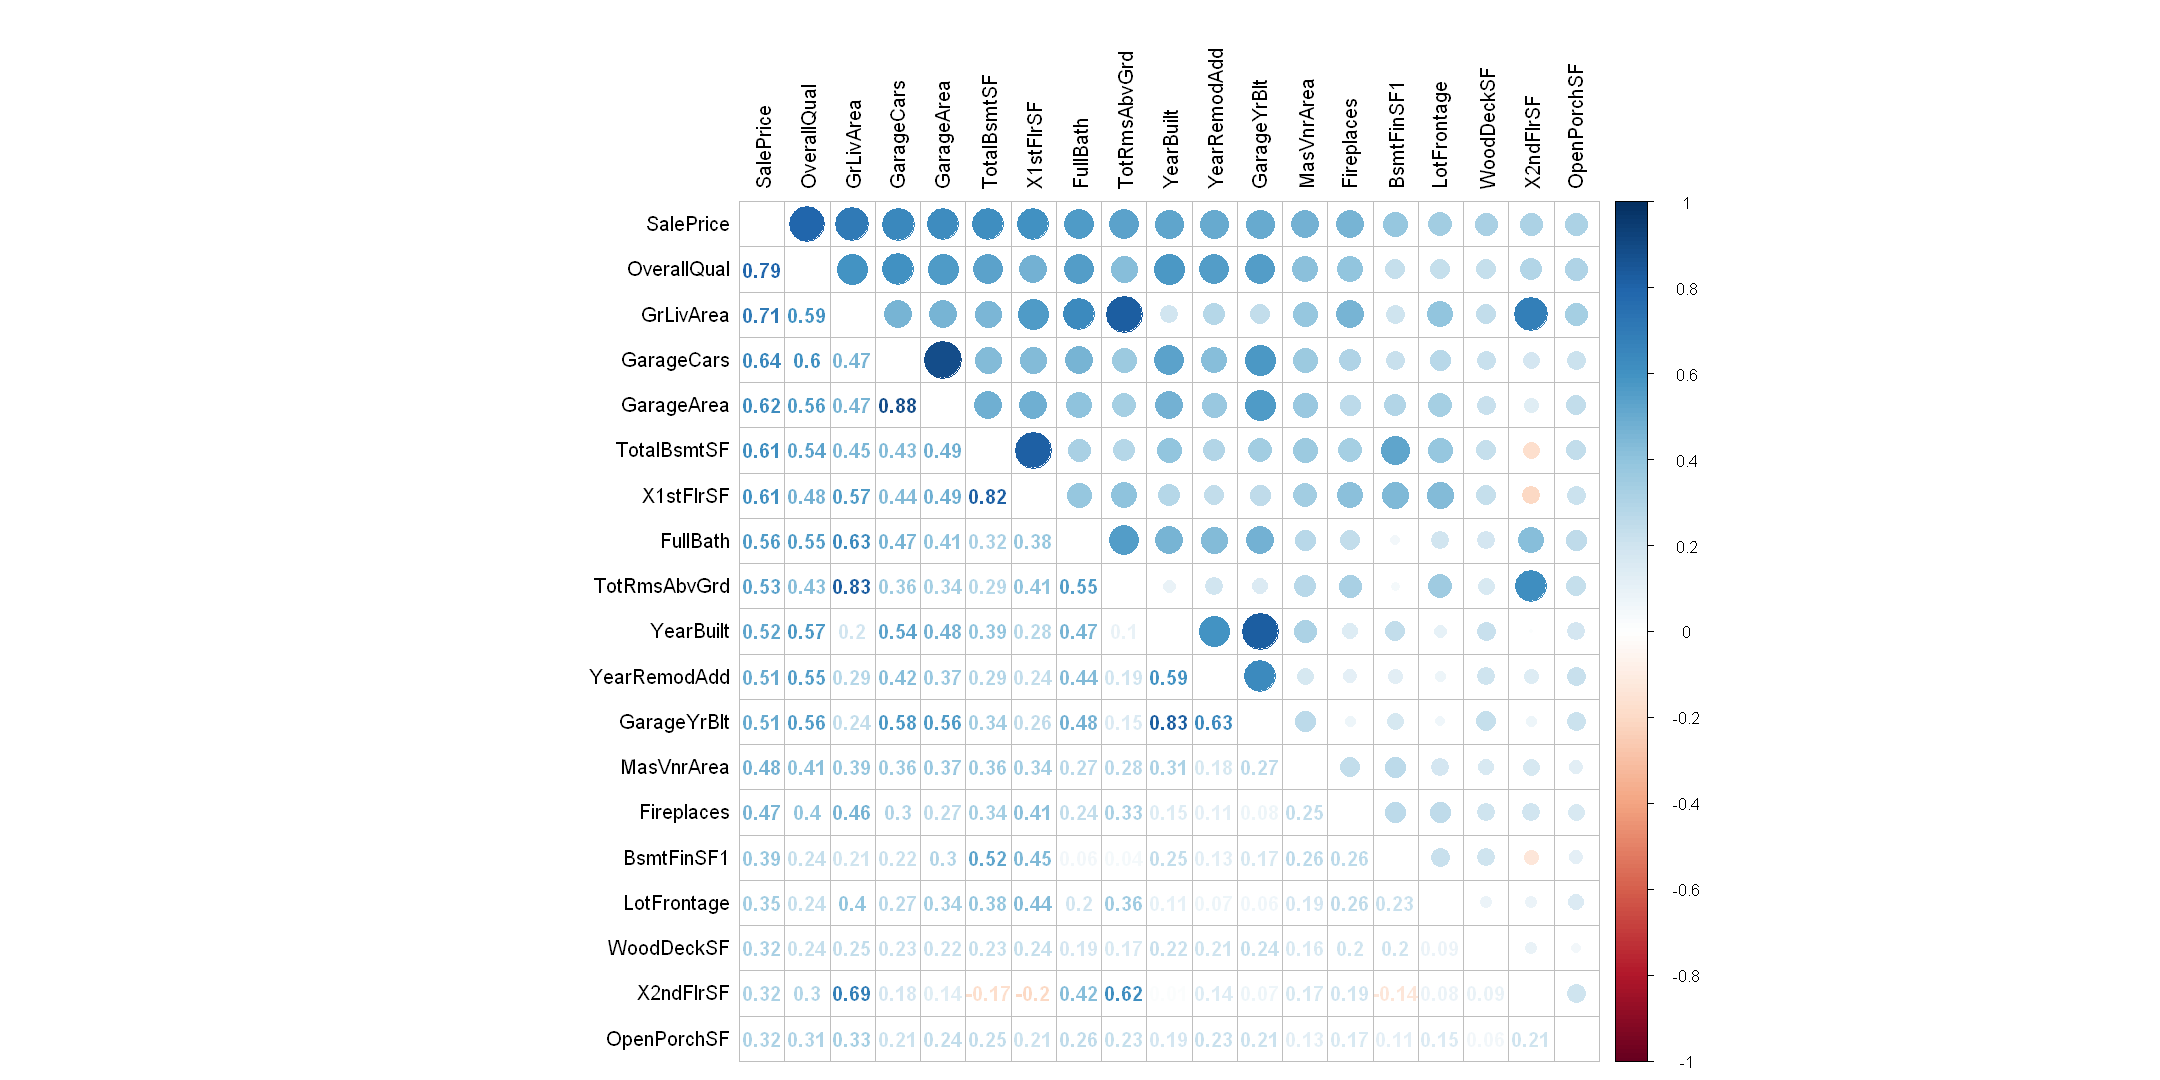

In [61]:
all_numVar <- all[, numericVars]

# correlations de toutes les features numériques
cor_numVar <- cor(all_numVar, use="pairwise.complete.obs") 

options(repr.plot.width = 18, repr.plot.height = 9)

# classement decroissant des corrélations avec la target
cor_sorted <- as.matrix(sort(cor_numVar[,'SalePrice'], decreasing = TRUE))

# filtre pour ne garder que les corrélations supérieurs en val. abs. à 0.3
CorHigh <- names(which(apply(cor_sorted, 1, function(x) (x > 0.3 | x < -0.3))))
cor_numVar <- cor_numVar[CorHigh, CorHigh]

# affiche le graphe
corrplot.mixed(cor_numVar, tl.col="black", tl.pos = "lt")

---  
# Validité des modèles


### baseline

In [58]:
lm_model_baseline <- lm(SalePrice ~ ., data=train)
summary(lm_model_baseline)


Call:
lm(formula = SalePrice ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-165711   -8873     196    9717  165711 

Coefficients: (3 not defined because of singularities)
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)          -4.508e+05  1.238e+06  -0.364 0.715798    
MSSubClass           -7.243e+01  9.586e+01  -0.756 0.450098    
MSZoningFV            2.728e+04  1.559e+04   1.749 0.080571 .  
MSZoningRH            1.325e+04  1.592e+04   0.832 0.405450    
MSZoningRL            2.088e+04  1.389e+04   1.504 0.133060    
MSZoningRM            1.541e+04  1.306e+04   1.180 0.238133    
LotFrontage           2.319e+01  5.450e+01   0.425 0.670592    
LotArea               7.337e-01  1.357e-01   5.407 8.30e-08 ***
StreetPave            2.735e+04  1.370e+04   1.997 0.046178 *  
LotShapeIR2           5.607e+03  5.099e+03   1.100 0.271844    
LotShapeIR3          -1.196e+03  1.108e+04  -0.108 0.914052    
LotShapeReg           3.228e+03  

### target modifié (log)

### selection de features

In [64]:
lm_model_selection <- lm(SalePrice ~ MSSubClass + LotArea + BsmtUnfSF +
                    X1stFlrSF + X2ndFlrSF + GarageCars+
                    WoodDeckSF + ExterCond, data=train)
summary(lm_model_selection)


Call:
lm(formula = SalePrice ~ MSSubClass + LotArea + BsmtUnfSF + X1stFlrSF + 
    X2ndFlrSF + GarageCars + WoodDeckSF + ExterCond, data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-429264  -20145    -842   19014  288980 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.180e+04  3.195e+04   0.682  0.49516    
MSSubClass  -8.277e+01  3.560e+01  -2.325  0.02026 *  
LotArea      1.248e-01  1.326e-01   0.941  0.34679    
BsmtUnfSF   -8.698e+00  3.302e+00  -2.634  0.00856 ** 
X1stFlrSF    9.763e+01  4.425e+00  22.065  < 2e-16 ***
X2ndFlrSF    6.294e+01  3.551e+00  17.725  < 2e-16 ***
GarageCars   3.627e+04  2.191e+03  16.552  < 2e-16 ***
WoodDeckSF   7.267e+01  1.174e+01   6.187 8.68e-10 ***
ExterCondFa -5.484e+04  3.319e+04  -1.652  0.09879 .  
ExterCondGd -4.121e+04  3.207e+04  -1.285  0.19917    
ExterCondPo -8.377e+04  5.516e+04  -1.519  0.12916    
ExterCondTA -3.745e+04  3.183e+04  -1.177  0.23965    
---
Signif. codes:  0 '***' 0

### imputation des valeurs nulles - sans objet (pas de na)

---  

# Modèles finale et comparaison des RMSE

---  


# Discussion

- ouverture à d'autres modèles tree-based & ensembliste, NN
- ici si besoin d'explicabilité reg lin intéressante mais nécessite plus de feat eng.
- pour améliorer: plus de data, plus de feat eng., comparer de nouveaux modèles...